Возьмите задачу с винами (https://www.kaggle.com/rajyellow46/wine-quality) и решите ее, оформив в виде CrispDM-подхода. Решение - jupyter notebook на github или colab.
Возьмите свое решение задачи с винами (ДЗ #2) и напишите небольшой отчет по этой задаче (1-1.5) страницы

## 1. Цель
  -  Предсказать по данным состава, какого качества получится вино.
  
     **Задача классификации**
       - quality < 7 - низкое качество вина
       - quality >= 7 - высокое качество вина
                                                 

# 2. Data Understanding
## 2.1 Import Libraries

In [154]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

## 2.2 Загрузка данных

In [36]:
df = pd.read_csv('datasets_winequality.csv')

**Описание переменных**
  - type - сорт вина белое/красное
  - fixed acidity - фиксированная кислотность
  - volatile acidity - волатильная кислотность 	
  - citric acid	- лимонная кислота
  - residual sugar - остаточный сахар
  - chlorides - хлориды
  - free sulfur dioxide - свободный диоксид серы	
  - total sulfur dioxide - общий диоксид серы
  - density	- плотность
  - pH - мера кислотности водных растворов
  - sulphates - сульфаты
  - alcohol	- алкоголь
  - quality - качество

## 2.3 Вспомогательные функции

In [233]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )  
    
def plot_histogram(df, feature_explanation):
    col_data = df[df[feature_explanation].between(
        df[feature_explanation].quantile(0.1),
        df[feature_explanation].quantile(0.9),
    )][[feature_explanation, "quality"]]
    bad_quality = col_data[col_data["quality"] < 7][feature_explanation]
    good_quality = col_data[col_data["quality"] >= 7][feature_explanation]
    
    bins = np.linspace(bad_quality.min(), bad_quality.max(), 100)
    sns.distplot(bad_quality, bins=bins, kde=False, norm_hist=True, label='bad_quality')
    sns.distplot(good_quality, bins=bins, kde=False, norm_hist=True, label='good_quality')
    plt.legend(loc="upper right")

## 2.4 Статистика и визуализации

## 2.4.1 Подробная статистика по каждой из переменных

In [124]:
df.describe(np.arange(0,1,0.1))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
0%,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
10%,6.000000,0.180000,0.140000,1.300000,0.031000,9.000000,30.000000,0.990670,3.020000,0.370000,9.100000,5.000000
20%,6.300000,0.210000,0.230000,1.700000,0.036000,15.000000,62.200000,0.991800,3.080000,0.410000,9.400000,5.000000
30%,6.500000,0.240000,0.260000,2.000000,0.040000,19.000000,89.000000,0.992800,3.130000,0.450000,9.600000,5.000000
40%,6.800000,0.270000,0.290000,2.300000,0.044000,24.000000,105.000000,0.993800,3.170000,0.480000,9.900000,6.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000


### 2.4.2 Корреляция может дать нам понимание того, какие переменные важны

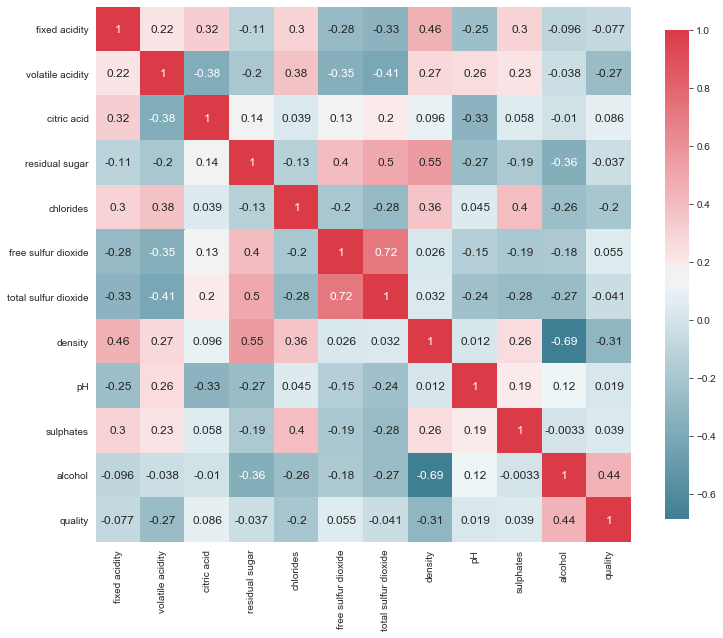

In [125]:
plot_correlation_map(df)

## 2.4.3 Рассмотрим взаимосвязь между признаками и качеством вина

**Первичные результаты:**

  *Вина хорошего качества имеют:* 
  - более высокий уровень алкоголя
  - более низкую плотность
  - более высокий pH
  - в винах высокого качества меньше остаточного сахара и хлоридов

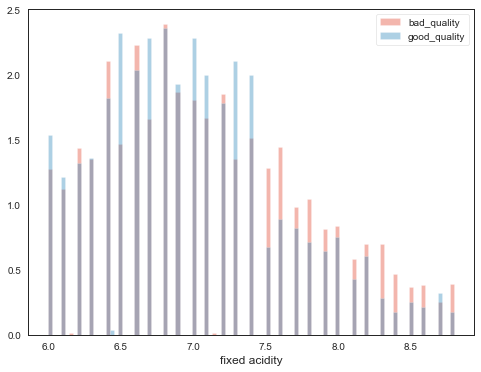

In [126]:
plot_histogram(df, 'fixed acidity')

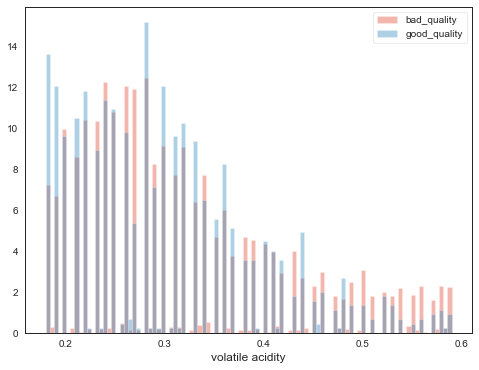

In [127]:
plot_histogram(df, 'volatile acidity')

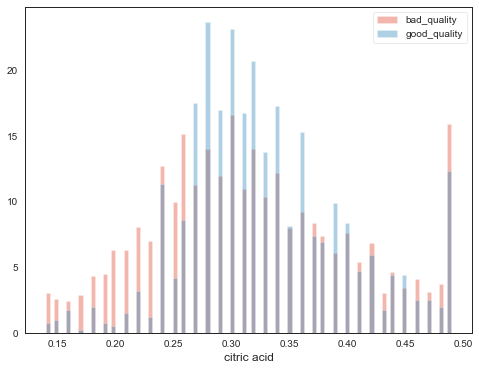

In [128]:
plot_histogram(df, 'citric acid')

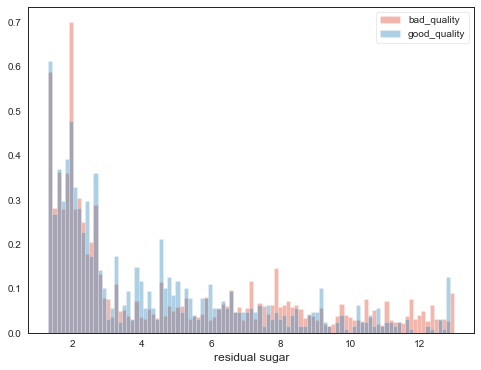

In [129]:
plot_histogram(df, 'residual sugar')

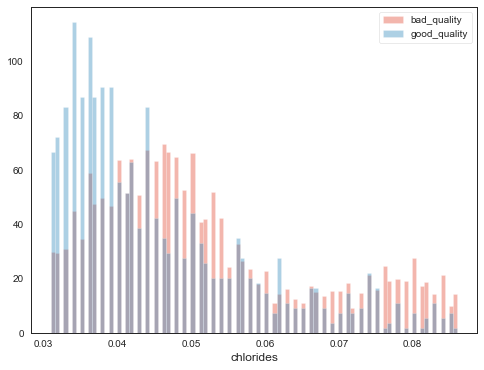

In [130]:
plot_histogram(df, 'chlorides')

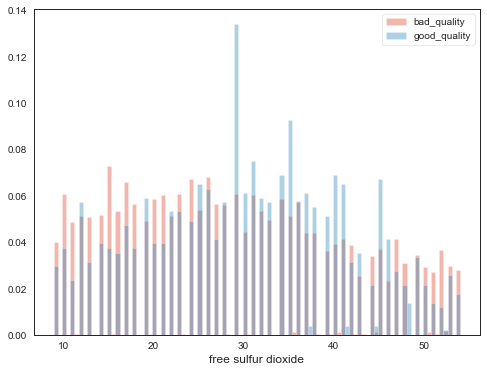

In [131]:
plot_histogram(df, 'free sulfur dioxide')

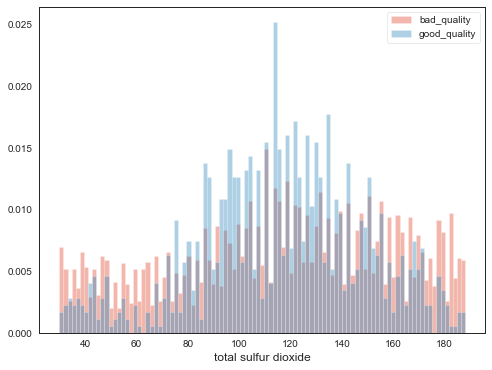

In [132]:
plot_histogram(df, 'total sulfur dioxide')

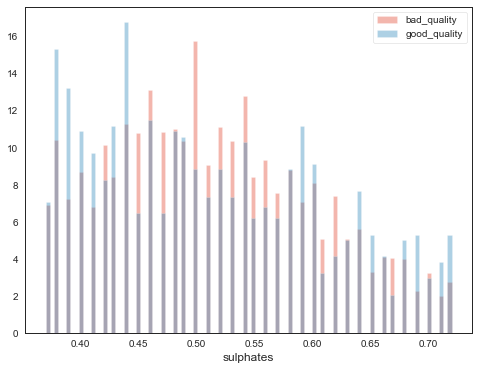

In [133]:
plot_histogram(df, 'sulphates')

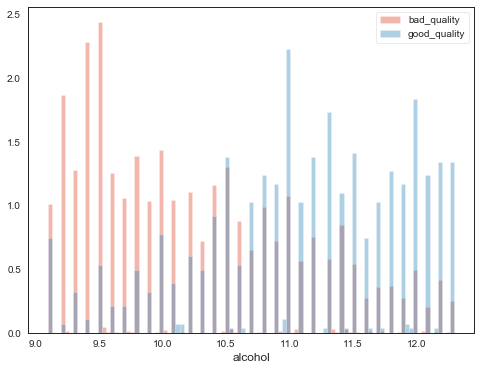

In [134]:
plot_histogram(df, 'alcohol')

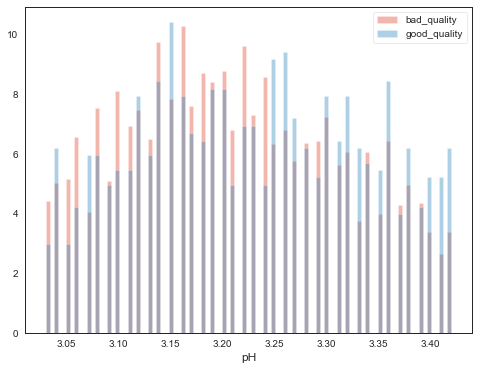

In [135]:
plot_histogram(df, 'pH')

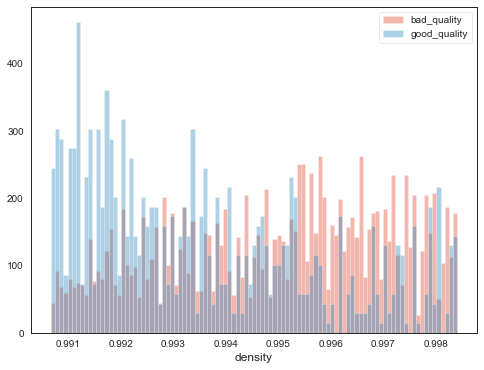

In [136]:
plot_histogram(df, 'density')

# 3. Data Preparation

## 3.1 Категориальные переменные должны быть преобразованы в числовые переменные

In [144]:
df['type'] = np.where(df['type'] == 'white', 1, 0)
df['target_quality'] = np.where(df['quality'] >= 7, 1, 0)

In [146]:
df['target_quality'].value_counts()

0    5220
1    1277
Name: target_quality, dtype: int64

## 3.2 Заполнить пропущенные значения в переменных

In [142]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [143]:
df['fixed acidity'].fillna((df['fixed acidity'].mean()), inplace=True)
df['volatile acidity'].fillna((df['volatile acidity'].mean()), inplace=True)
df['citric acid'].fillna((df['citric acid'].mean()), inplace=True)
df['residual sugar'].fillna((df['residual sugar'].mean()), inplace=True)
df['chlorides'].fillna((df['chlorides'].mean()), inplace=True)
df['pH'].fillna((df['pH'].mean()), inplace=True)
df['sulphates'].fillna((df['sulphates'].mean()), inplace=True)

### 3.3 Создание датасетов

Отделяем данные для обучения и для проверки

In [147]:
X = df.drop(['quality','target_quality'], axis = 1)
y = df['target_quality']

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# 4. Моделирование и обучение модели

In [162]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [184]:
# Выводим важность признаков (TOP-5) 
importances = list(rfc.feature_importances_)[:]
feature_importances = [(feature, round(importance, 5)) for feature, importance in zip(list(X.columns), importances) if importance > 0]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: | {:20} | Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: | alcohol              | Importance: 0.15578
Variable: | density              | Importance: 0.11867
Variable: | chlorides            | Importance: 0.08619
Variable: | volatile acidity     | Importance: 0.08453
Variable: | residual sugar       | Importance: 0.08419
Variable: | total sulfur dioxide | Importance: 0.08409
Variable: | sulphates            | Importance: 0.08292
Variable: | pH                   | Importance: 0.07852
Variable: | citric acid          | Importance: 0.0775
Variable: | free sulfur dioxide  | Importance: 0.0768
Variable: | fixed acidity        | Importance: 0.07081


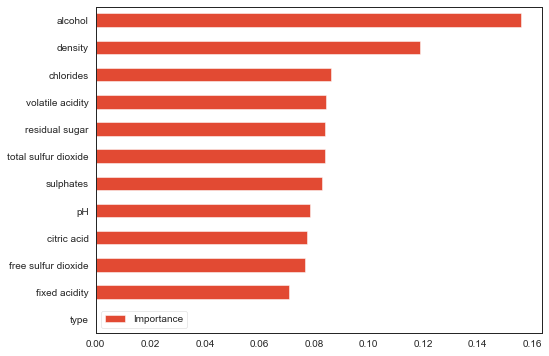

In [232]:
imp = pd.DataFrame( 
        rfc.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
imp = imp.sort_values( [ 'Importance' ] , ascending = True )
imp.plot( kind = 'barh' )

# 5. Оценка

In [186]:
print('Accuracy', accuracy_score(y_test, pred_rfc))
print('F1', f1_score(y_test, pred_rfc, average='weighted'))
print('AUC', roc_auc_score(y_test, pred_rfc))

Accuracy 0.8776923076923077
F1 0.8656822771884954
AUC 0.7397402569150615
